# Скрипт для качественных аугментаций

## Задаём расположения данных, константы и делаем нужные импорты

In [21]:
# Путь к исходной обучающей выборке
PATH_TO_TRAIN = './input/plates/plates/train'
# Путь к маскам 
PATH_TO_MASKS = './input/plates/plates/masks'
# Путь к результатам аугментации
PATH_TO_AUG = './input/plates/plates/aug'

In [22]:
# количество аугментаций на одну фотографию
AUGMENTATIONS_COUNT = 10

In [23]:
# максимальный множитель для маски
AUGMENTATIONS_MULTIPLIER_MAX_VALUE = 40

In [24]:
# вероятность поменять каналы местами (в процентах)
P_OF_SHUFFLE = 30
# вероятность инвертировать каналы
P_OF_INVERTION = 40
# вероятность прибавки шума к слою с цветом
P_OF_CHANGING = 20

In [25]:
# модуль (p поля галуа) для операций сложения / умножения
MODULUS = 255

In [26]:
%matplotlib inline

In [27]:
import PIL
from random import sample
from random import randint
from random import shuffle
from os.path import join
from os import listdir
import matplotlib.pyplot as plt
import numpy as np

In [28]:
labels = ['cleaned', 'dirty']

## Для любого изображения из папок dirty / cleaned создадим множество изображений - аналогов в папке augments/dirty or cleaned

In [29]:
def show_image(image: PIL.Image) -> None:
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
# производит свои кастомные аугментации
def transform(image: PIL.Image, mask: PIL.Image) -> PIL.Image:
    image_array = np.array(image, dtype=np.int16)
    mask_array = np.array(mask, dtype=np.int16)
    
    if randint(0, 100) < P_OF_SHUFFLE:
        image_copy = image_array.copy()
        
        order = [0, 1, 2]
        shuffle(order)
        
        for channel_index, new_channel_index in enumerate(order):
            image_array[:, :, channel_index] = image_copy[:, :, new_channel_index]
            
        return PIL.Image.fromarray(image_array.astype(np.uint8))
    
    if randint(0, 100) < P_OF_INVERTION:      
        channel = randint(0, 2)
        
        for row in range(len(image_array[:, 0, 0])):
            for col in range(len(image_array[0, :, 0])):
                image_array[row, col, channel] = MODULUS - image_array[row, col, channel]
        
        return PIL.Image.fromarray(image_array.astype(np.uint8))
    
    for channel in range(3):
        new_color = randint(-AUGMENTATIONS_MULTIPLIER_MAX_VALUE, AUGMENTATIONS_MULTIPLIER_MAX_VALUE)
        for row in range(len(mask_array[:, 0, 0])):
            for col in range(len(mask_array[0, :, 0])):
                mask_array[row, col, channel] = new_color if mask_array[row, col, channel] > 20 else mask_array[row, col, channel]
        
        if P_OF_CHANGING >= randint(0, 100):
            image_array[:, :, channel] = mask_array[:, :, channel]
        else:
            image_array[:, :, channel] = (image_array[:, :, channel] + mask_array[:, :, channel]) % MODULUS
    
    return PIL.Image.fromarray(image_array.astype(np.uint8))
    

In [30]:
for label in labels:
    print("handling " + label)
    
    # Путь к обучающим данным класса label
    path = join(PATH_TO_TRAIN, label)
    n = len(listdir(path))

    for index, image_name in enumerate(listdir(path)):
        print('handling: {} {}/{}'.format(image_name, index + 1, n))
        
        image = PIL.Image.open(join(path, image_name))
        mask = PIL.Image.open(join(PATH_TO_MASKS, label, image_name))
    
        for count in range(AUGMENTATIONS_COUNT):
            new_image = transform(image, mask)
            new_image.save(PATH_TO_AUG + '/' + label + '/' + image_name[:4] + str(count) + '.jpg')

handling cleaned
handling: 0006.jpg 1/20
handling: 0000.jpg 2/20
handling: 0019.jpg 3/20
handling: 0015.jpg 4/20
handling: 0004.jpg 5/20
handling: 0009.jpg 6/20
handling: 0016.jpg 7/20
handling: 0001.jpg 8/20
handling: 0002.jpg 9/20
handling: 0011.jpg 10/20
handling: 0005.jpg 11/20
handling: 0013.jpg 12/20
handling: 0014.jpg 13/20
handling: 0003.jpg 14/20
handling: 0018.jpg 15/20
handling: 0017.jpg 16/20
handling: 0007.jpg 17/20
handling: 0012.jpg 18/20
handling: 0008.jpg 19/20
handling: 0010.jpg 20/20
handling dirty
handling: 0006.jpg 1/20
handling: 0000.jpg 2/20
handling: 0019.jpg 3/20
handling: 0015.jpg 4/20
handling: 0004.jpg 5/20
handling: 0009.jpg 6/20
handling: 0016.jpg 7/20
handling: 0001.jpg 8/20
handling: 0002.jpg 9/20
handling: 0011.jpg 10/20
handling: 0005.jpg 11/20
handling: 0013.jpg 12/20
handling: 0014.jpg 13/20
handling: 0003.jpg 14/20
handling: 0018.jpg 15/20
handling: 0017.jpg 16/20
handling: 0007.jpg 17/20
handling: 0012.jpg 18/20
handling: 0008.jpg 19/20
handling: 0

## Визуализируем часть полученных результатов

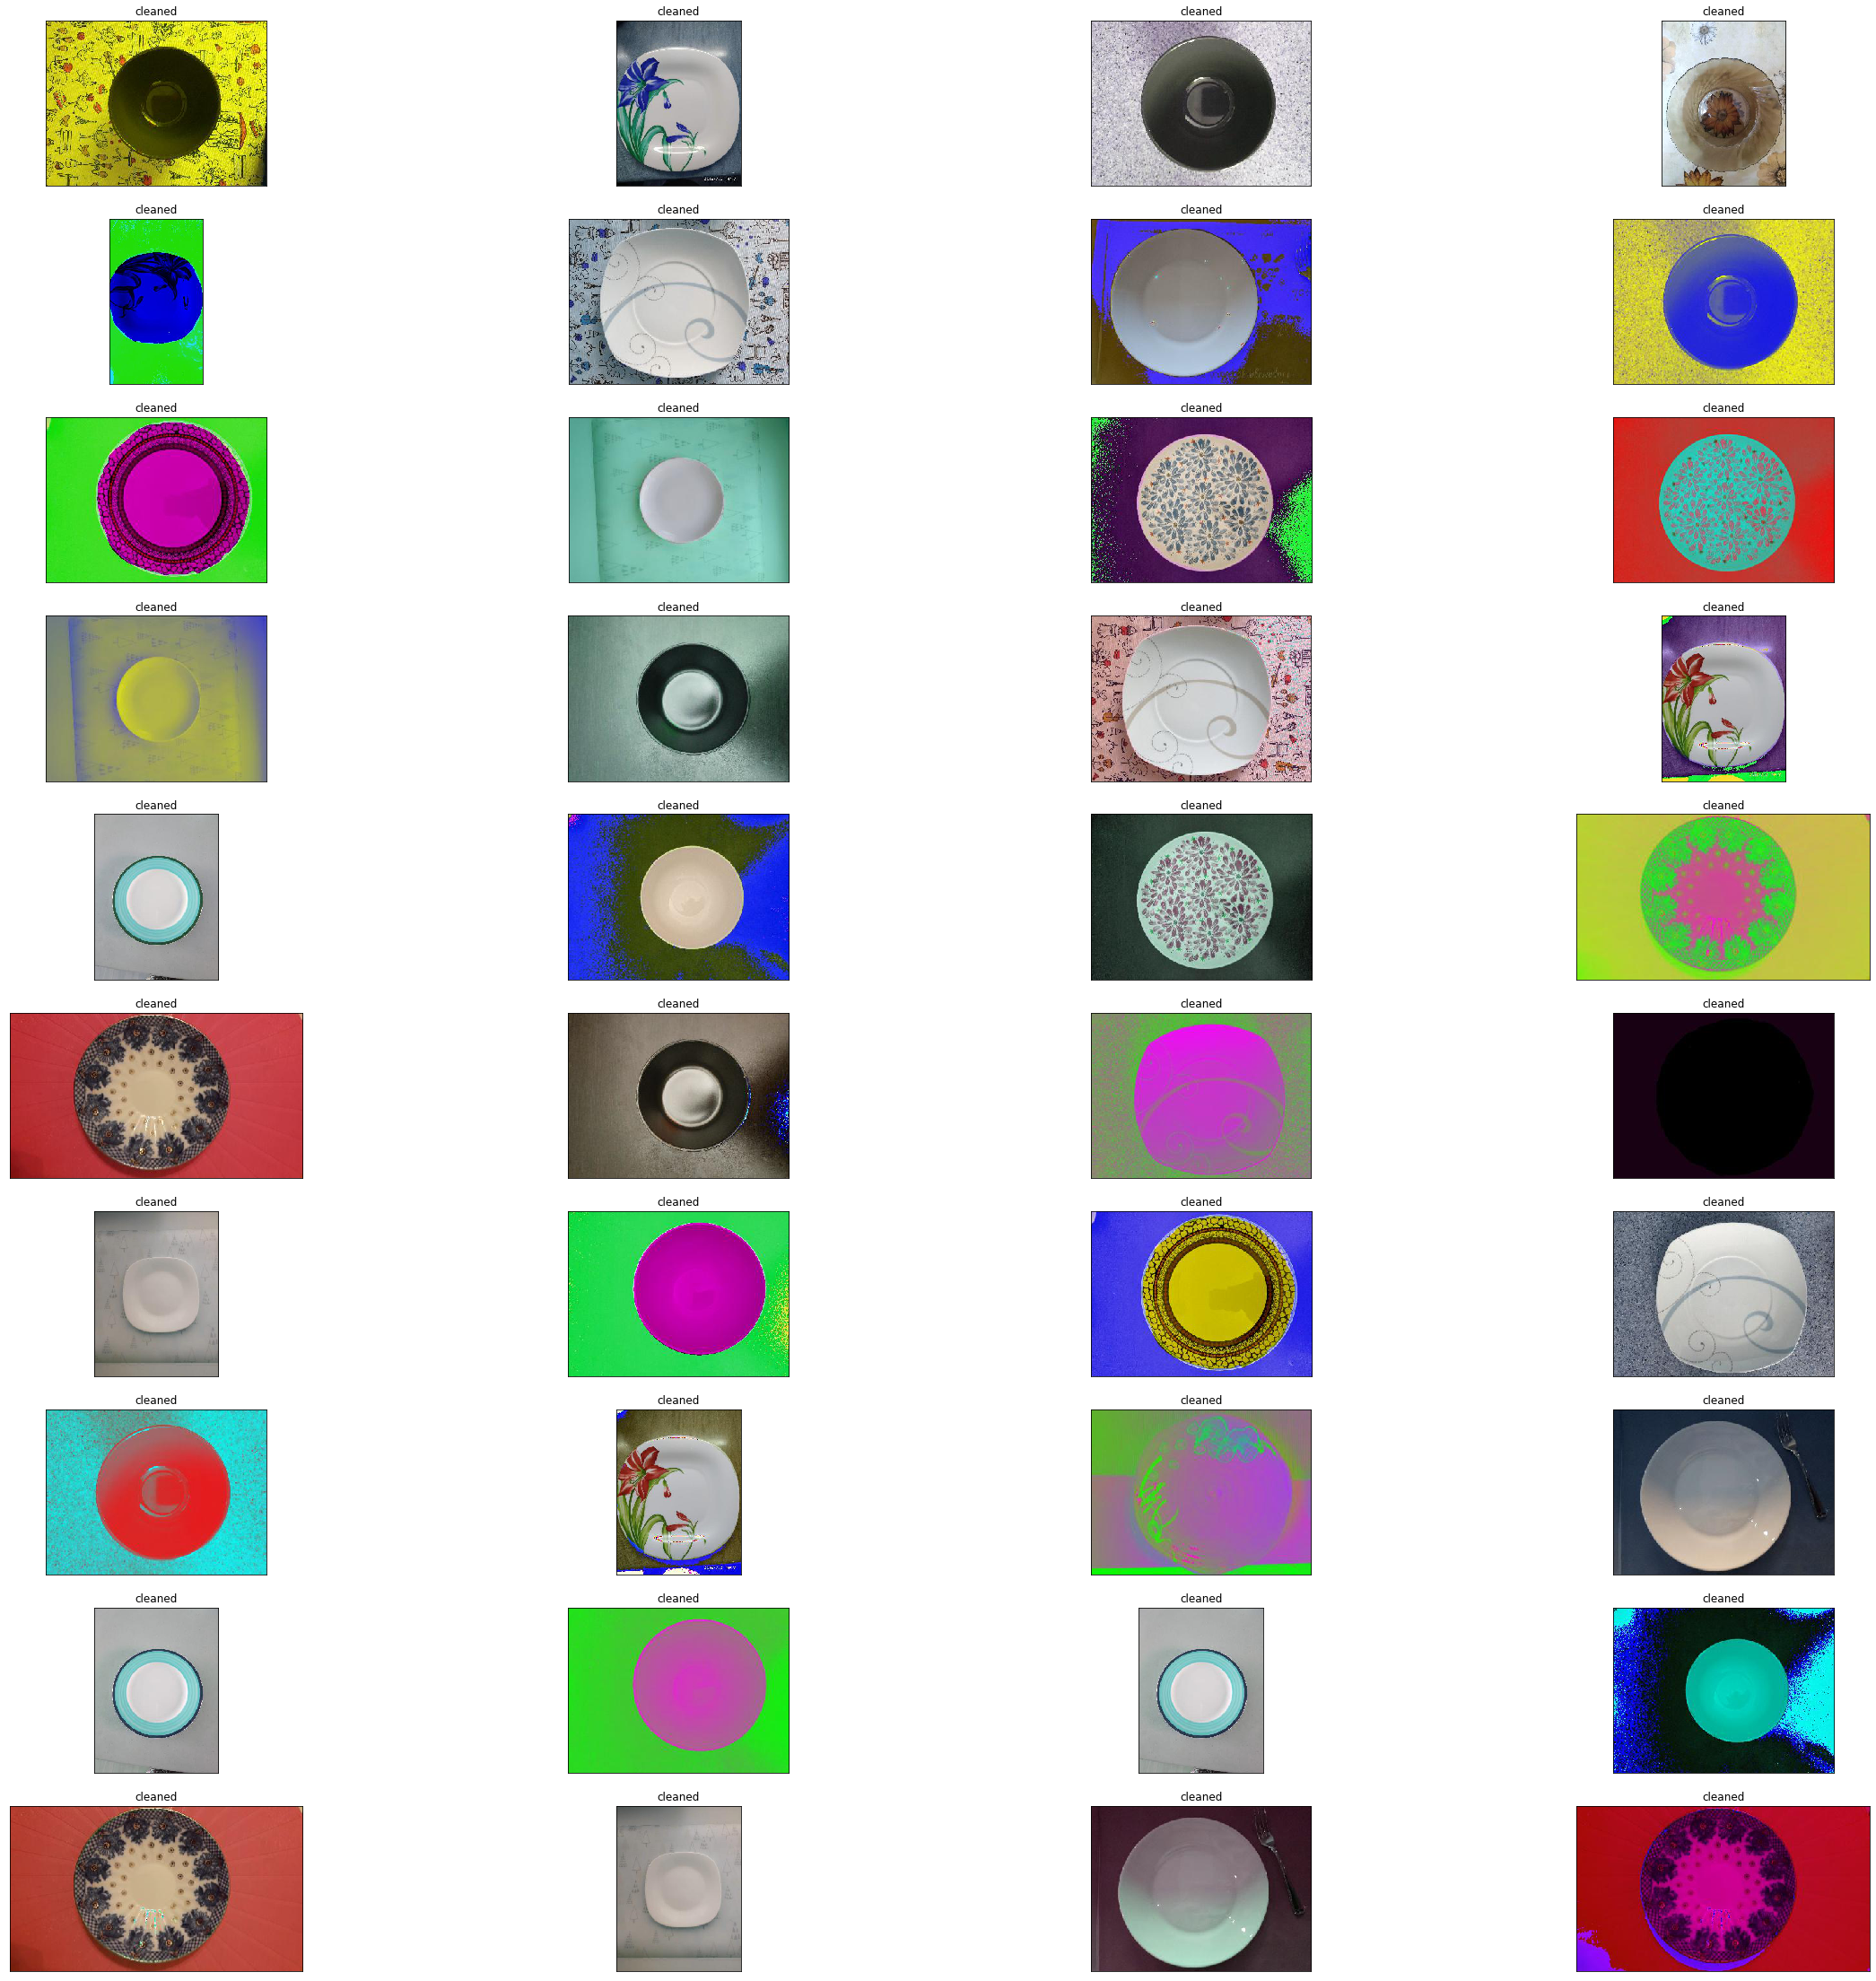

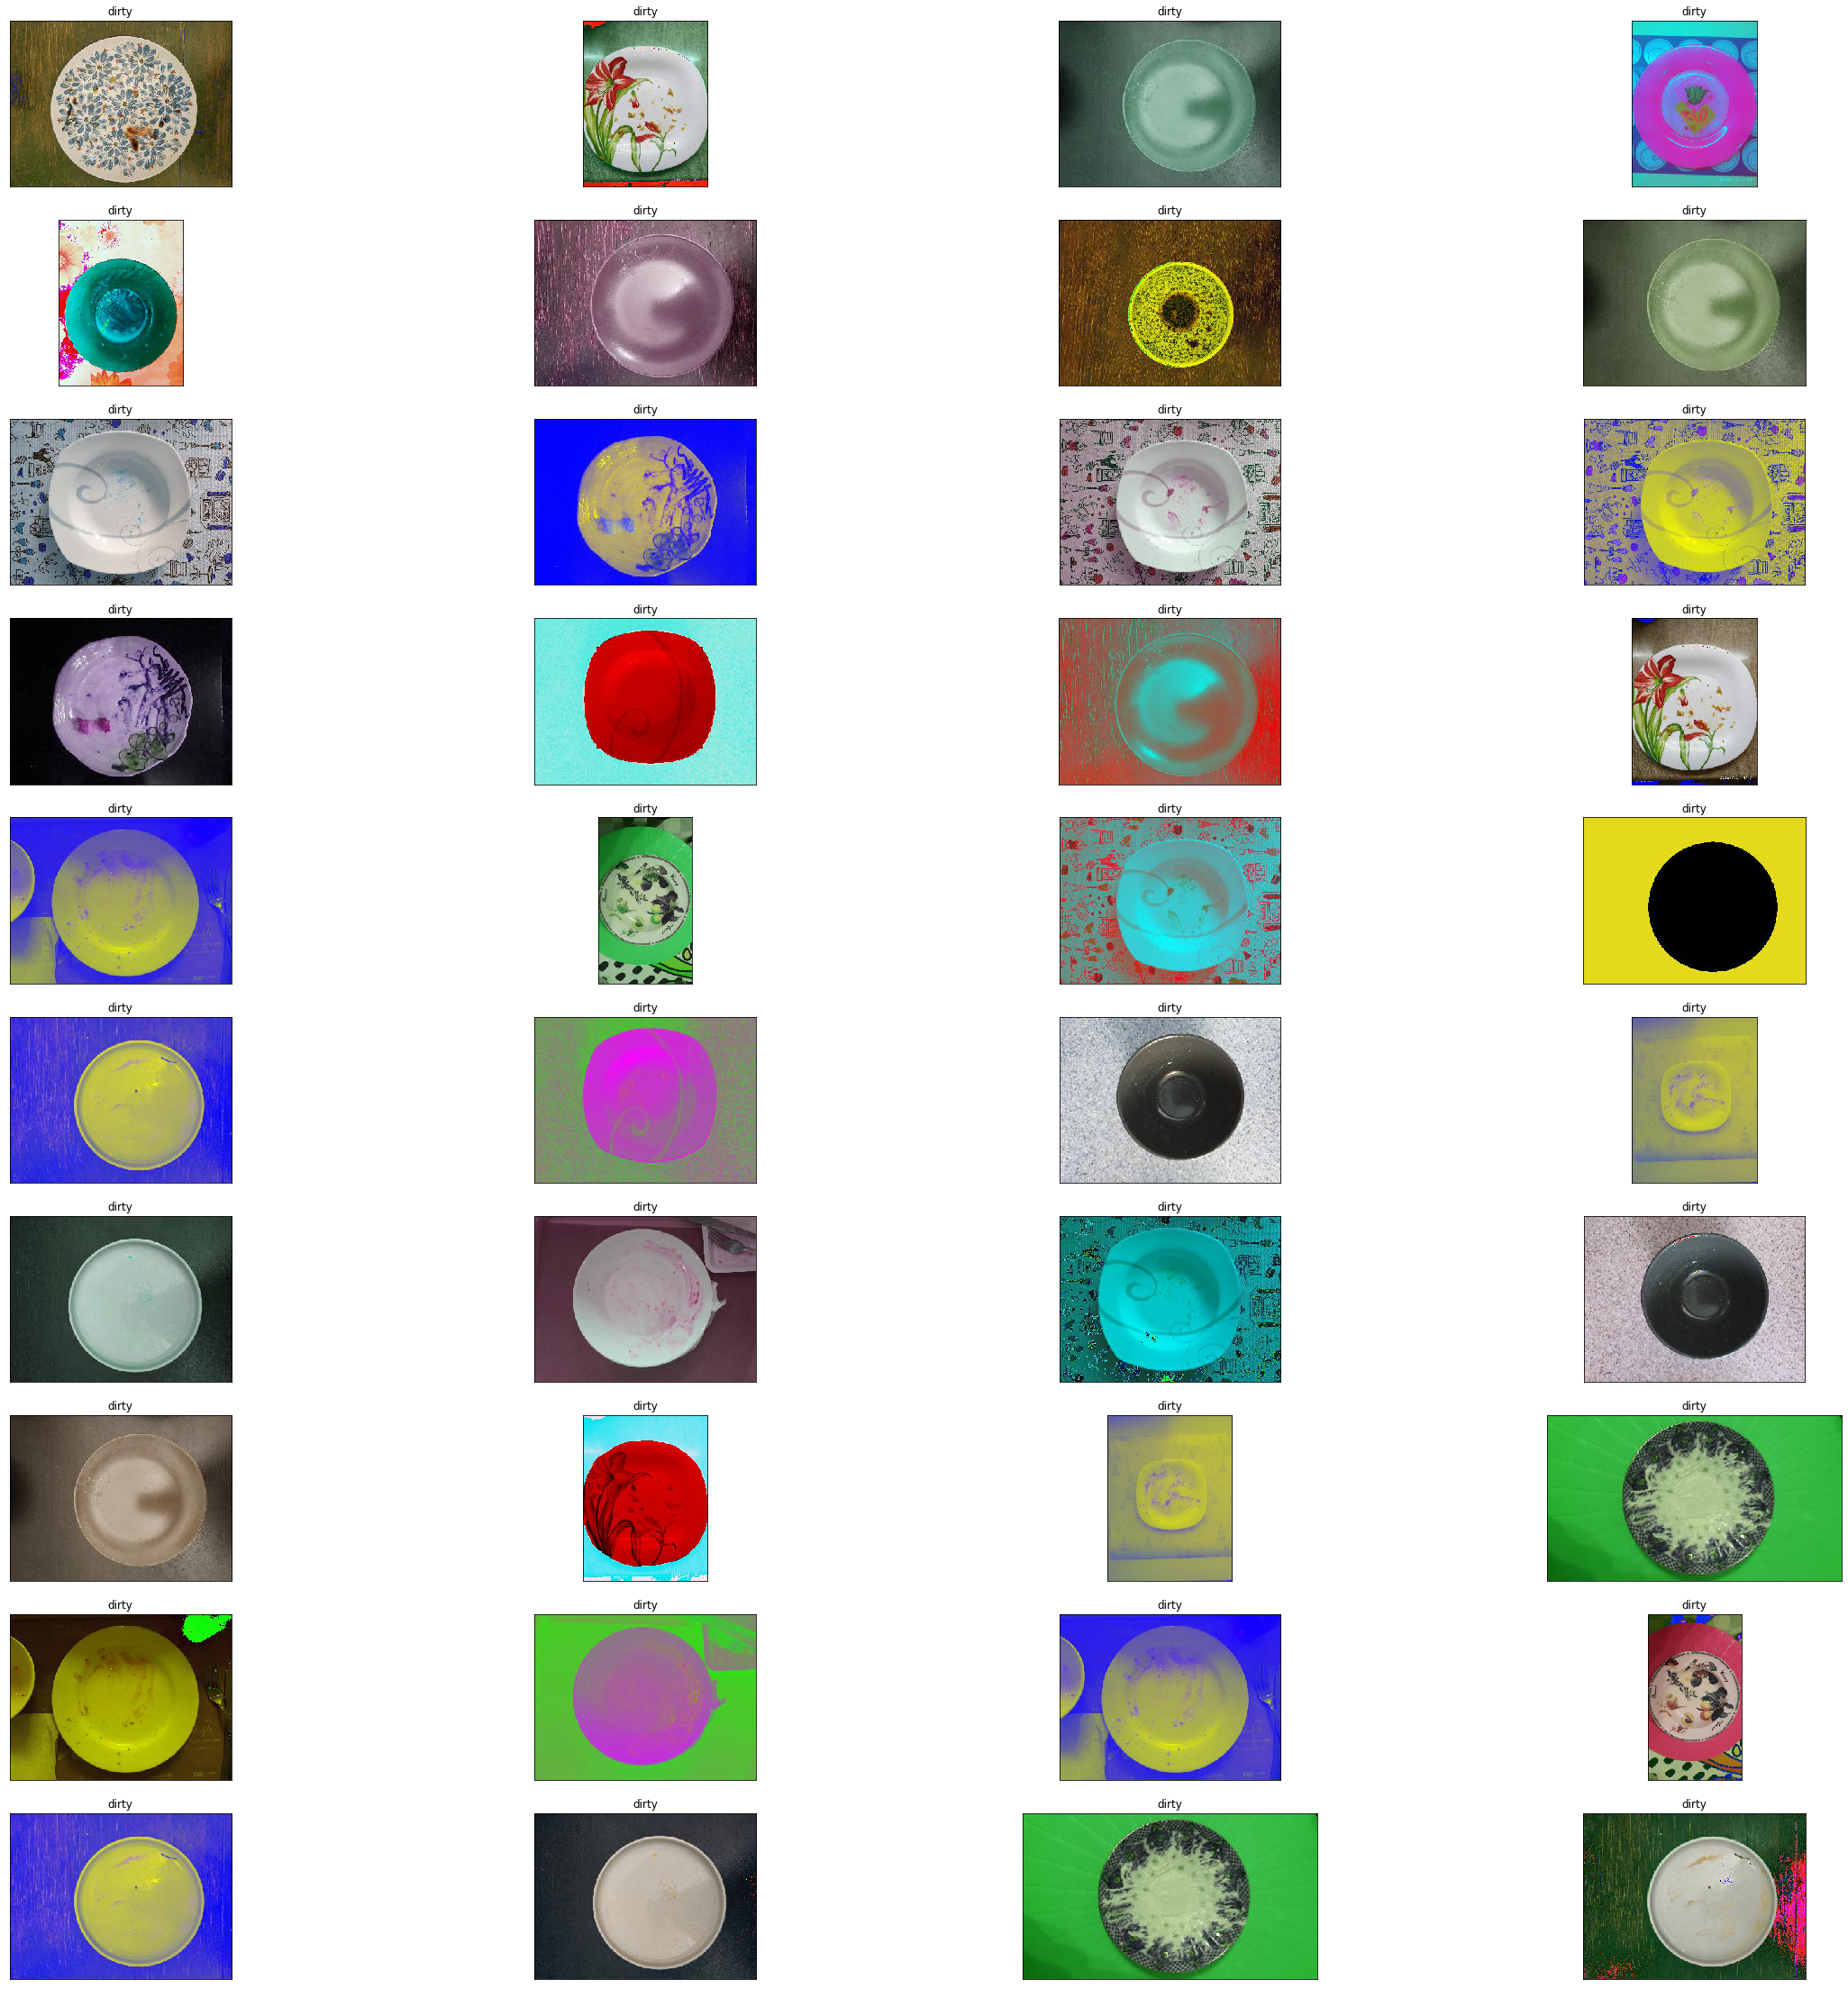

In [31]:
    for label in labels:
        path = join(PATH_TO_AUG, label)
        
        images = listdir(path)
        images = images[:len(images) // 5]
        
        n = len(images)
    
        plt.figure(figsize=(40, 40))
        for i, image in enumerate(images):
            plt.subplot(n/4, 4, i+1)
            img = PIL.Image.open(join(path, image))
            plt.imshow(img)
            plt.title(label)
            plt.xticks([])
            plt.yticks([])
        plt.show()